<a href="https://colab.research.google.com/github/SalikFillah/Sentiment-Algorithm/blob/main/Twitter%20WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Algorithm
### with social media twitter using "snscrape" package

In [1]:
!pip install snscrape
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 2.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Advance Search
query = "ferdy sambo"
tweets = []
limit = 500

for tweet in sntwitter.TwitterSearchScraper(query).get_items():

  if len(tweets) == limit:
    break
  else :
    tweets.append([tweet.date, tweet.user.username, tweet.content])

<ipython-input-2-ffdfb570c1ad>:14: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.user.username, tweet.content])


In [3]:
df = pd.DataFrame(tweets, columns=['Tanggal','Pengguna','Tweet'])
df

,Tanggal,Pengguna,Tweet
0,2023-02-13 14:16:30+00:00,SelfieUti,Yuk hasilkan uang 3 JUTA/Hari dari foto Selfie...
1,2023-02-13 14:16:29+00:00,polmaroy,Putri Candrawathi https://t.co/frxaZTN0wJ Ferd...
2,2023-02-13 14:16:13+00:00,yannesputra,Membayangkan sudut pandang seorang Ferdy sambo...
3,2023-02-13 14:16:10+00:00,detikcom,Vonis 20 tahun penjara yang dijatuhkan hakim t...
4,2023-02-13 14:15:25+00:00,arempeg,Vonis Ferdy Sambo Bukti Keberhasilan Kolaboras...
...,...,...,...
495,2023-02-13 12:53:03+00:00,aphelionie,@knovemberr @ronggo_digdo @convomf Semuanya di...
496,2023-02-13 12:52:57+00:00,Jatengpostcom,"Baru Tiup Lilin Ultah ke-50, Ferdy Sambo Langs..."
497,2023-02-13 12:52:57+00:00,ernimardania,@kurawa semoga selanjutnya ini yg diusut🙏\nBRE...
498,2023-02-13 12:52:53+00:00,Lintas_MNCTV,Hakim menjatuhkan hukuman 20 tahun penjara kep...


### Preprocessing
clean up the contents of the tweet in such a way as to make it easier to read

In [4]:
!pip install unidecode
from unidecode import unidecode
from html import unescape
from tqdm import tqdm
import re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 5.7 MB/s eta 0:00:00


In [5]:
def cleanText(txt):
# Mengubah huruf kapital dan menangani spasi
    docx = unidecode(unescape(txt.lower().strip()))
# Menghilangkan URL
    docx = re.sub(r'(\w+:\/\/\S+)',' ', docx)
# Menghilangkan Hashtag
    docx = re.sub(r'#(\w+)',' ',docx)
# Menghilangkan User
    docx = re.sub(r'(@[A-Za-z0-9]+)',' ',docx)
# Menghilangkan Simbol
    docx = re.sub(r'[^\w]',' ', docx)
# Menghilangkan Underscore
    docx = re.sub(r'[_]',' ',docx)
    return docx

In [6]:
df['clean_tweet'] = ''
for idx, post in tqdm(df.iterrows()):
    df.at[idx, 'clean_tweet'] = cleanText(post.Tweet)

500it [00:00, 4469.60it/s]


In [7]:
df

,Tanggal,Pengguna,Tweet,clean_tweet
0,2023-02-13 14:16:30+00:00,SelfieUti,Yuk hasilkan uang 3 JUTA/Hari dari foto Selfie...,yuk hasilkan uang 3 juta hari dari foto selfie...
1,2023-02-13 14:16:29+00:00,polmaroy,Putri Candrawathi https://t.co/frxaZTN0wJ Ferd...,putri candrawathi ferdy sambo
2,2023-02-13 14:16:13+00:00,yannesputra,Membayangkan sudut pandang seorang Ferdy sambo...,membayangkan sudut pandang seorang ferdy sambo...
3,2023-02-13 14:16:10+00:00,detikcom,Vonis 20 tahun penjara yang dijatuhkan hakim t...,vonis 20 tahun penjara yang dijatuhkan hakim t...
4,2023-02-13 14:15:25+00:00,arempeg,Vonis Ferdy Sambo Bukti Keberhasilan Kolaboras...,vonis ferdy sambo bukti keberhasilan kolaboras...
...,...,...,...,...
495,2023-02-13 12:53:03+00:00,aphelionie,@knovemberr @ronggo_digdo @convomf Semuanya di...,digdo semuanya di tangan hakim berikutny...
496,2023-02-13 12:52:57+00:00,Jatengpostcom,"Baru Tiup Lilin Ultah ke-50, Ferdy Sambo Langs...",baru tiup lilin ultah ke 50 ferdy sambo langs...
497,2023-02-13 12:52:57+00:00,ernimardania,@kurawa semoga selanjutnya ini yg diusut🙏\nBRE...,semoga selanjutnya ini yg diusut breaking ne...
498,2023-02-13 12:52:53+00:00,Lintas_MNCTV,Hakim menjatuhkan hukuman 20 tahun penjara kep...,hakim menjatuhkan hukuman 20 tahun penjara kep...


### Word Cloud
displays some words that often appear in the contents of the tweet

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

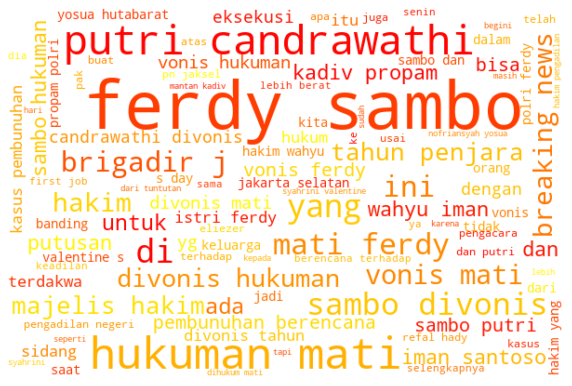

In [9]:
# Melihat Plot WordCloud 
allWords = ' '.join( [twts for twts in df['clean_tweet']] )
#font = '/Comfortaa_Bold.ttf'
wordCloud = WordCloud(background_color = "white",
                      #font_path = font,
                      width = 600,
                      height = 400,
                      max_words = 100,
                      colormap = 'autumn_r').generate(allWords)
plt.figure(figsize = (10,10))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()